In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('eda_data.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn',
       'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [4]:
df_model = df[['avg_salary','Rating','Size', 'Type of ownership', 'Industry', 'Sector','Revenue','num_comp',
              'hourly','employer_provided','job_state', 'same_state','age', 'python_yn',
               'rstudio_yn', 'spark_yn', 'aws_yn', 'excel_yn','job_simp', 'seniority',
               'desc_len']]

In [5]:
# Get Dummy Data
df_dum = pd.get_dummies(df_model)

In [6]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [7]:
X = df_dum.drop('avg_salary',axis = 1)
y = df_dum.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import statsmodels.api as sm
X_sm = x = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     9.473
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           1.32e-88
Time:                        09:36:23   Log-Likelihood:                -3308.9
No. Observations:                 742   AIC:                             6906.
Df Residuals:                     598   BIC:                             7570.
Df Model:                         143                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                39.5103      6.700      5.897      0.000      26.353      52.668
Rating                                                6.5349      1.932      3.382      0.001       2.740      10.330
num_comp                                              2.4374      0.866      2.816      0.005       0.737       4.138
hourly                                              -38.3686      9.148     -4.194      0.000     -56.336     -20.402
employer_provided                                   -20.5251     11.493     -1.786      0.075     -43.096       2.046
same_state                                            3.1002      2.612      1.187      0.236      -2.030       8.230
age                                                   0.0296      0.030      0.987      0.324      -0.029       0.088
python_yn                                             7.4475      2.518      2.958      0.003       2.502      12.393
rstudio_yn                                           13.2632     28.953      0.458      0.647     -43.600      70.126
spark_yn                                              0.1532      2.916      0.053      0.958      -5.575       5.881
aws_yn                                                0.1360      2.732      0.050      0.960      -5.230       5.502
excel_yn                                             -0.7511      2.262     -0.332      0.740      -5.193       3.691
desc_len                                              0.0002      0.001      0.316      0.752      -0.001       0.002
Size_-1                                              14.4299      8.605      1.677      0.094      -2.470      31.329
Size_1 to 50 employees                                2.9961      6.483      0.462      0.644      -9.736      15.728
Size_10000+ employees                                -3.3557      5.784     -0.580      0.562     -14.716       8.004
Size_1001 to 5000 employees                           5.7978      3.868      1.499      0.134      -1.799      13.394
Size_201 to 500 employees                             2.8222      3.863      0.731      0.465      -4.764      10.408
Size_5001 to 10000 employees                         -4.5314      5.425     -0.835      0.404     -15.187       6.124
Size_501 to 1000 employees                            2.2409      4.048      0.554      0.580      -5.709      10.191
Size_51 to 200 employees                              4.0363      4.410      0.915      0.360      -4.624      12.696
Size_Unknown                                         15.0741     13.953      1.080      0.280     -12.328      42.477
Type of ownership_-1                                 14.4299      8.605      1.677      0.094      -2.470      31.329
Type of ownersh

In [9]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train,y_train)
np.mean(cross_val_score(lm, X_train, y_train, scoring = 'neg_mean_absolute_error',cv=3))

-204718566.56377733

In [10]:
#Lasso Regression
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring = 'neg_mean_absolute_error',cv=3))

-19.268477607778063

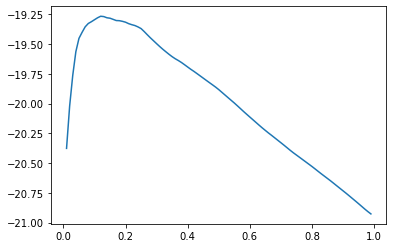

In [11]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring = 'neg_mean_absolute_error',cv=3)))
plt.plot(alpha,error)

In [12]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
11,0.12,-19.265538


In [13]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_absolute_error',cv=3))

-15.076424297529234

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [15]:
gs.best_score_

-14.765930200132894

In [16]:
gs.best_estimator_

RandomForestRegressor(n_estimators=130)

In [17]:
#test ensembles
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
mean_absolute_error(y_test,tpred_lm)

206100396.91798955

In [20]:
mean_absolute_error(y_test,tpred_lml)

19.930747642236113

In [21]:
mean_absolute_error(y_test,tpred_rf)

10.983970946896196

In [26]:
rf.fit(X_train,y_train)
rf.predict(X_test).mean()

102.39748900717426

In [28]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

In [29]:
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

In [31]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

array([54.13846154])

In [33]:
list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 34.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
